In [1]:
%matplotlib widget
import pandas as pd
import warnings
from matplotlib import pyplot as plt
import numpy as np
warnings.filterwarnings('ignore')
from datetime import timedelta
import flow_loop_preprocess_XW as process
import seaborn as sns

**07-13**

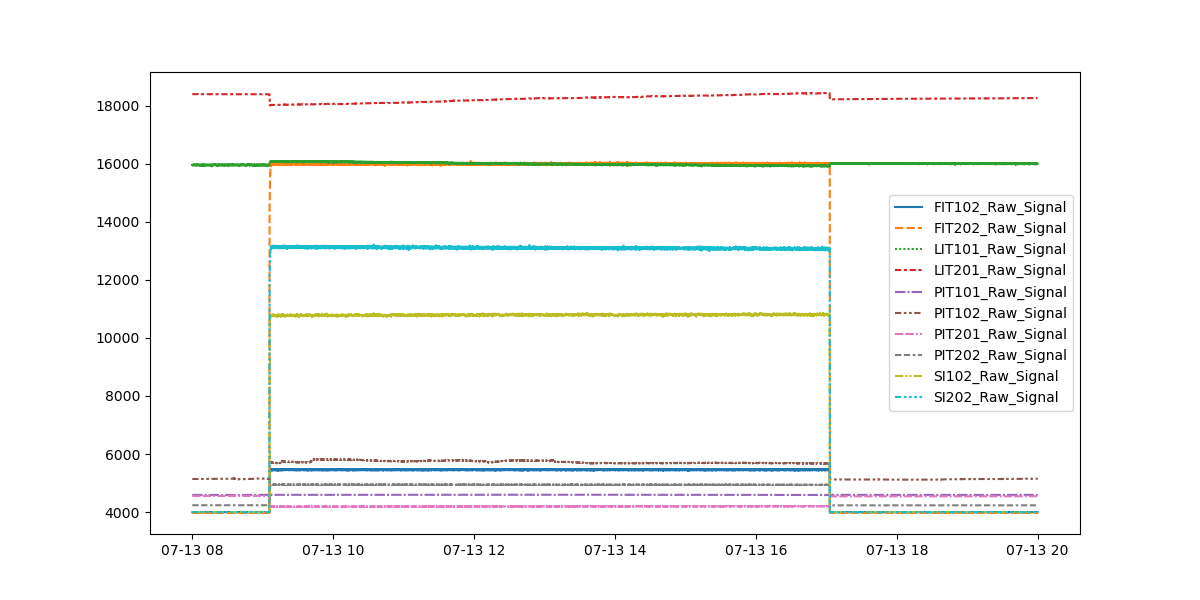

In [2]:
data = pd.read_csv(r'C:\Users\Wang\OneDrive\Data science\S2DS\Data\flow_loop\processed\Flow_Loop_Data_071322.csv')
df = process.resample('2S', data)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df)
#plt.ion()
plt.show()

**07-14**

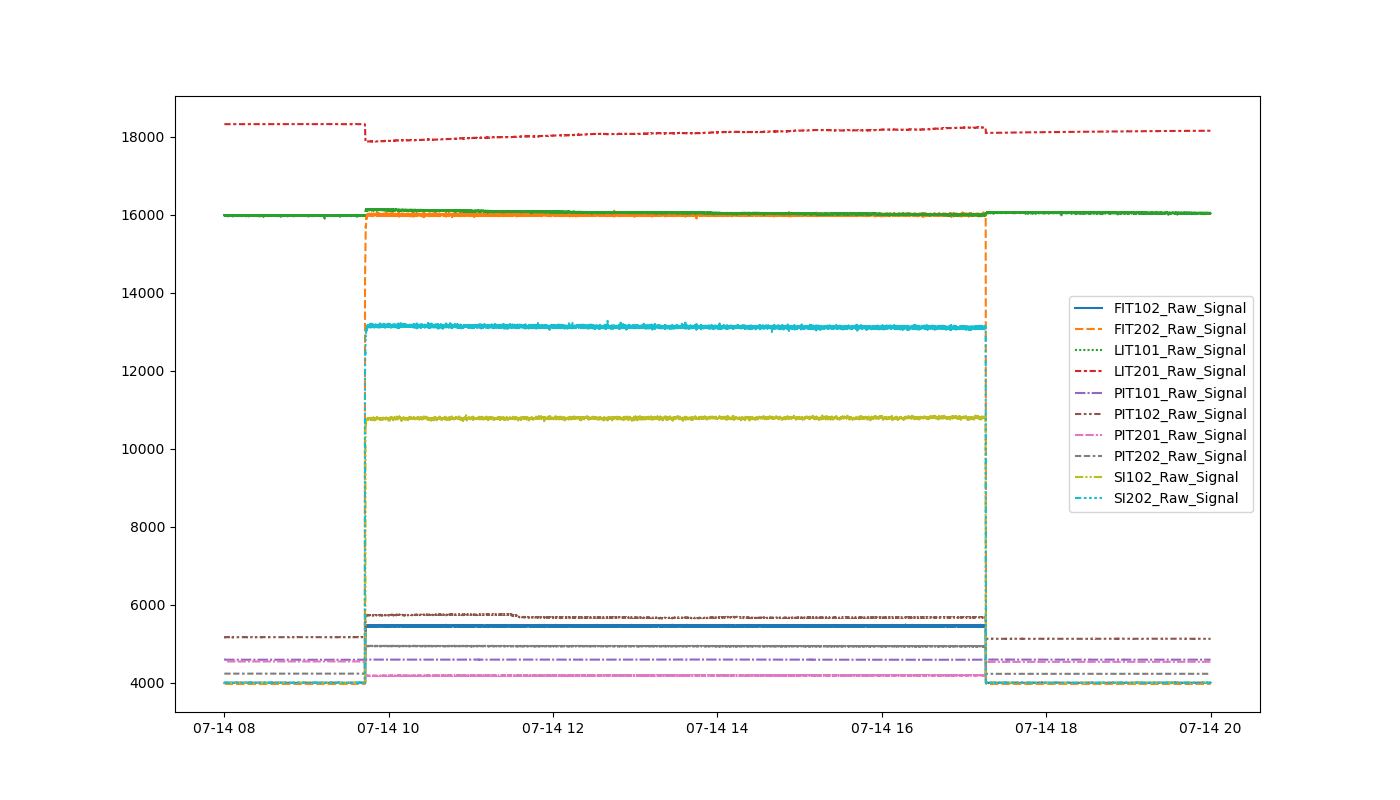

In [3]:
data = pd.read_csv(r'C:\Users\Wang\OneDrive\Data science\S2DS\Data\flow_loop\processed\Flow_Loop_Data_071422.csv')
df = process.resample('2S', data)
plt.figure(figsize=(14, 8))
sns.lineplot(data=df)
plt.show()

**07-15**

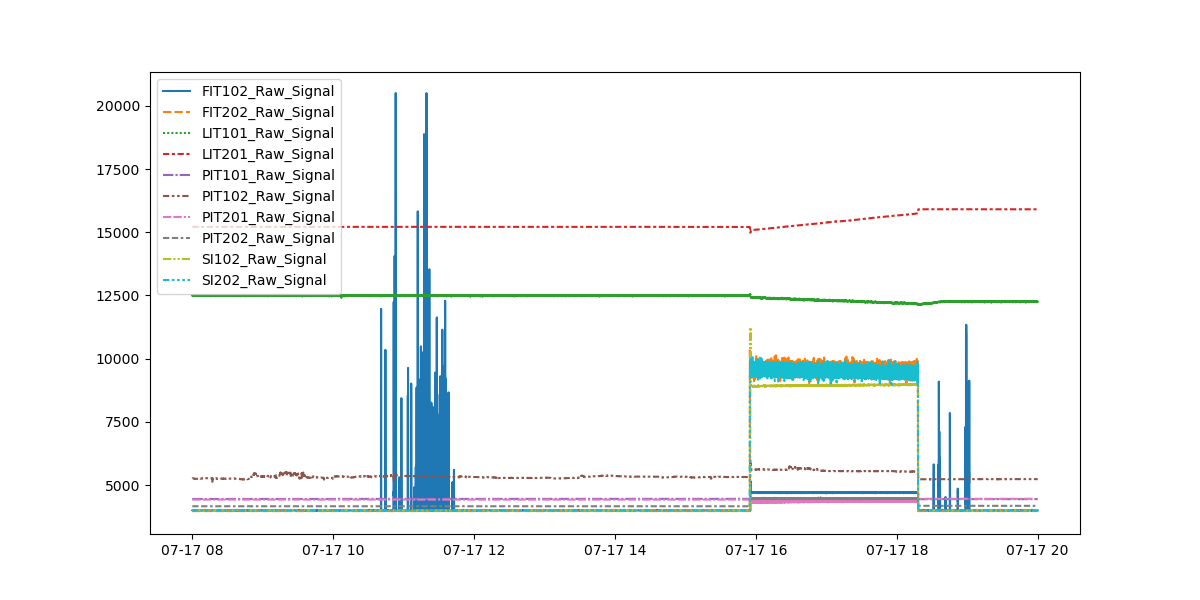

In [11]:
data = pd.read_csv(r'C:\Users\Wang\OneDrive\Data science\S2DS\Data\flow_loop\processed\Flow_Loop_Data_071722.csv')
df = process.resample('2S', data)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df)
plt.show()

**07-17**

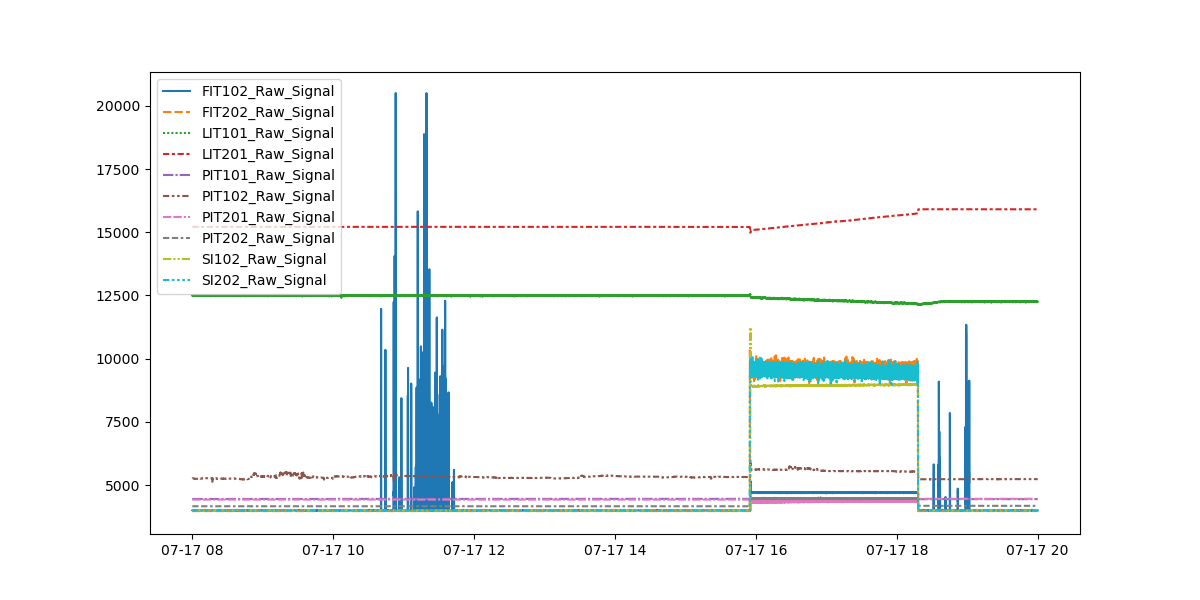

In [15]:
data = pd.read_csv(r'C:\Users\Wang\OneDrive\Data science\S2DS\Data\flow_loop\processed\Flow_Loop_Data_071722.csv')
df = process.resample('2S', data)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df)
plt.show()

**07-20**

In [2]:
data = pd.read_csv(r'C:\Users\Wang\OneDrive\Data science\S2DS\Data\flow_loop\Flow_Loop_Data_072022.csv')

In [3]:
data = process.table_formatting(data)

In [4]:
data.columns

Index(['time_FIT102', 'FIT102', 'time_FIT102_Raw_Signal', 'FIT102_Raw_Signal',
       'time_FIT202', 'FIT202', 'time_FIT202_Raw_Signal', 'FIT202_Raw_Signal',
       'time_LIT101', 'LIT101', 'time_LIT101_Raw_Signal', 'LIT101_Raw_Signal',
       'time_LIT201', 'LIT201', 'time_LIT201_Raw_Signal', 'LIT201_Raw_Signal',
       'time_PIT101', 'PIT101', 'time_PIT101_Raw_Signal', 'PIT101_Raw_Signal',
       'time_PIT102', 'PIT102', 'time_PIT102_Raw_Signal', 'PIT102_Raw_Signal',
       'time_PIT201', 'PIT201', 'time_PIT201_Raw_Signal', 'PIT201_Raw_Signal',
       'time_PIT202', 'PIT202', 'time_PIT202_Raw_Signal', 'PIT202_Raw_Signal',
       'time_SI102', 'SI102', 'time_SI102_Raw_Signal', 'SI102_Raw_Signal',
       'time_SI202', 'SI202', 'time_SI202_Raw_Signal', 'SI202_Raw_Signal'],
      dtype='object')

In [6]:
data['LIT101_Raw_Signal']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
347960   NaN
347961   NaN
347962   NaN
347963   NaN
347964   NaN
Name: LIT101_Raw_Signal, Length: 347965, dtype: float64

In [24]:

for col in data:
    if data[col].dtype == 'O':
        data[col] = pd.to_datetime(data[col])
i = 0
while i <= (data.shape[1] - 2):
    # pick every sensor data with its timeseries 
    sub_df = process.pull_feature(i, i+1, data)
    # resample with the given time_interval and take mean value
    sub_df = sub_df.resample('1S').mean().bfill()
    if i == 0:
        df = sub_df
    else:
        # join to one uniform timeindex
        df = df.join(sub_df, how='outer')
    i += 2
    # take only the raw values
    df = df.loc[:, df.columns.str.contains('Raw')]
    print(i, i+1)

2 3
4 5
6 7
8 9
10 11


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Float64Index'

In [31]:
data.iloc[:, [10, 11]]

,time_LIT101_Raw_Signal,LIT101_Raw_Signal
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
347961,NaN,NaN
347962,NaN,NaN
347963,NaN,NaN
347964,NaN,NaN


**08-01**

In [6]:
data = pd.read_csv(r'C:\Users\Wang\OneDrive\Data science\S2DS\Data\flow_loop\processed\Flow_Loop_Data_080122.csv')
df = process.resample('2S', data)

In [7]:
df.head()

,FIT102_Raw_Signal,FIT202_Raw_Signal,LIT101_Raw_Signal,LIT201_Raw_Signal,PIT101_Raw_Signal,PIT102_Raw_Signal,PIT201_Raw_Signal,PIT202_Raw_Signal,SI102_Raw_Signal,SI202_Raw_Signal
2022-08-01 08:00:00,NaN,NaN,12042.0,NaN,4403.000000,5150.000000,NaN,4124.5,4000.500000,NaN
2022-08-01 08:00:02,NaN,3972.5,12035.5,NaN,4401.666667,5150.666667,NaN,4124.5,4000.666667,3997.0
2022-08-01 08:00:04,NaN,3972.0,12039.5,13632.5,4403.000000,5150.500000,NaN,4124.5,4001.000000,3998.0
2022-08-01 08:00:06,NaN,3973.0,12013.0,13631.0,4402.666667,5150.500000,NaN,4125.0,4000.666667,3999.5
2022-08-01 08:00:08,3994.333333,3972.5,12037.0,13632.5,4404.000000,5152.000000,NaN,4124.5,4000.000000,3998.0


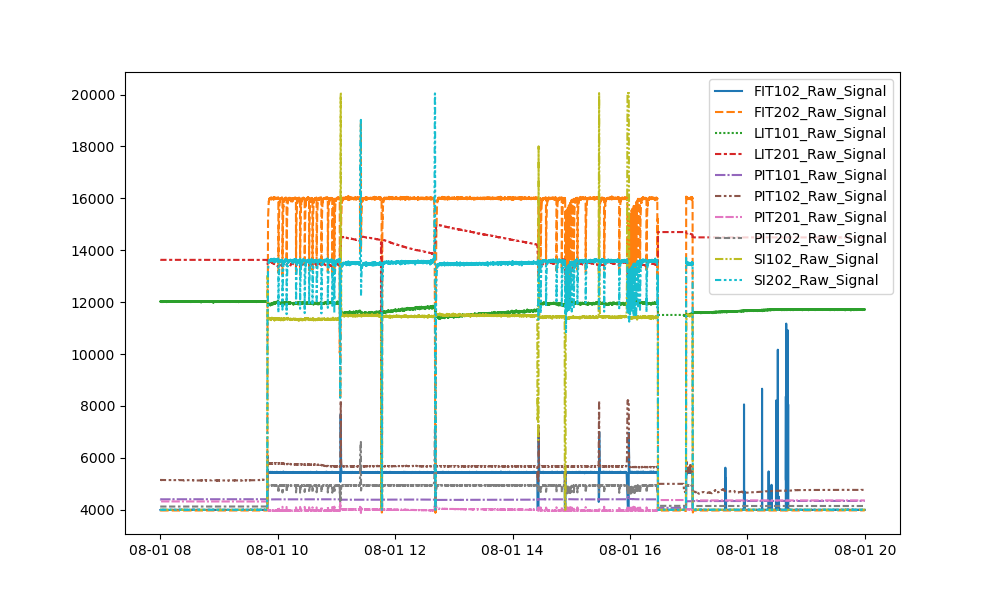

In [8]:
plt.figure(figsize=(10, 6))
#sns.lineplot(data=df)
sns.lineplot(data=df)
#plt.vlines(['2022-08-01 10:00:30', '2022-08-01 10:00:35'], 4000, 16000)
plt.show()